## code to generate panels in Figure 3

Load libraries and dataset from pi_tailtrack experiment

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os, glob
from scipy.signal import savgol_filter
import sys


# get and set directories
dir_path = sys.path[0]
data_dir = os.path.join(dir_path, '20221213')

out_dir = os.path.join(data_dir, 'fig_data')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

os.chdir(data_dir)

# load datasets
data = np.loadtxt(glob.glob('*coords.txt')[0], delimiter=',')
t_stamps = np.loadtxt(glob.glob('*tstamps.txt')[0], delimiter=',')

Plot two events, the first is a struggle event, the second is a set of 3 swimming events

c:\Users\owen.randlett\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1540: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi
C:\Users\owen.randlett\AppData\Local\Temp/ipykernel_15804/2559938232.py:15: RuntimeWarning: Mean of empty slice
  orients = np.nanmean(angles, axis=1)
C:\Users\owen.randlett\AppData\Local\Temp/ipykernel_15804/2559938232.py:18: RuntimeWarning: Mean of empty slice
  bend_amps = np.nanmean(diff_angles, axis=1)


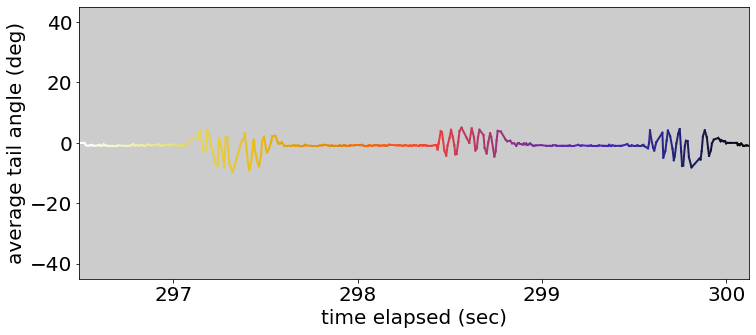

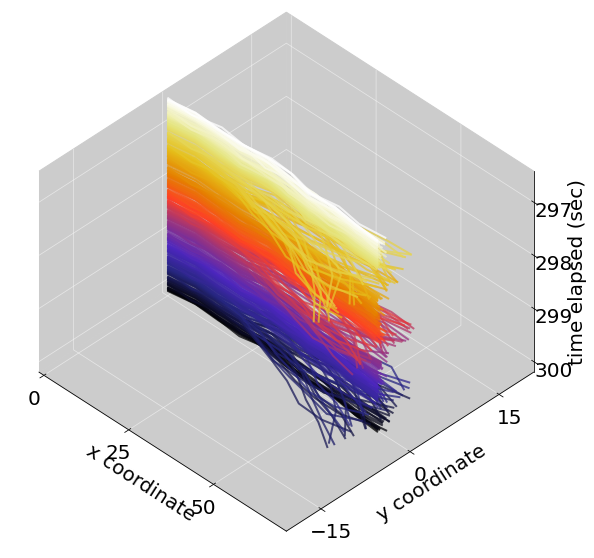

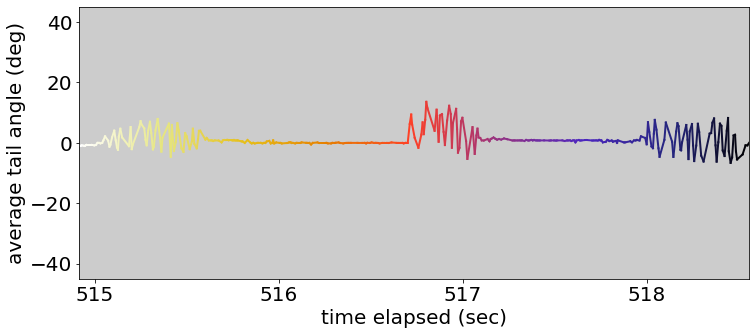

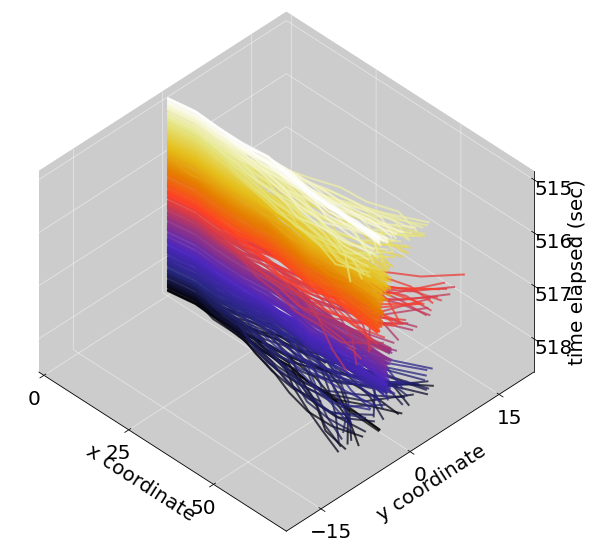

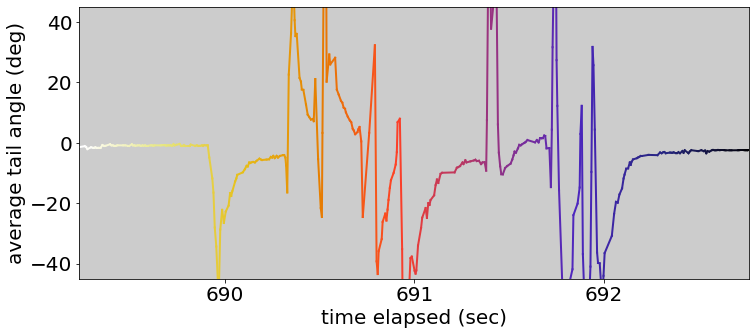

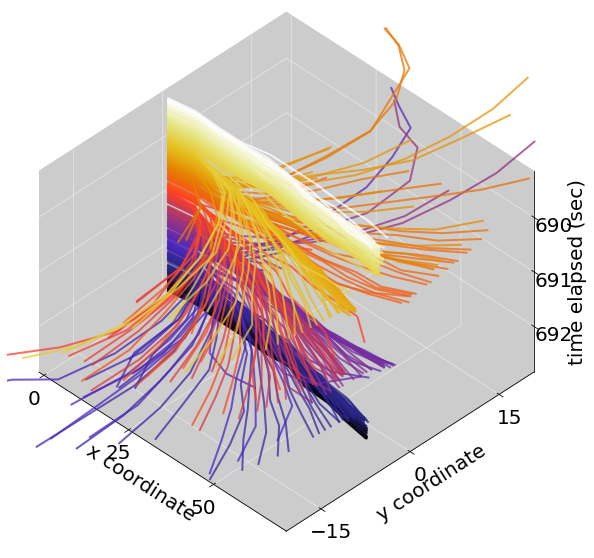

In [22]:

os.chdir(out_dir)

stim = t_stamps[1::2]
time = t_stamps[::2]
x_coords = data[::2, :]
x_coords = x_coords - np.nanmean(x_coords[:,0], axis=0)
y_coords = data[1::2, :] 
y_coords = y_coords - np.nanmean(y_coords[:,0], axis=0)

n_frames = len(x_coords)

angles = np.arctan2(np.diff(y_coords, axis=1), np.diff(x_coords, axis=1))
angles = np.unwrap(angles)

orients = np.nanmean(angles, axis=1)
diff_angles = np.diff(angles, axis=1)

bend_amps = np.nanmean(diff_angles, axis=1)
bend_amps[np.isnan(bend_amps)] = 0
bend_amps_filt = savgol_filter(bend_amps, 11, 5)

cmap = cm.get_cmap('CMRmap_r')

bracket = 350
n_frames_plot = bracket
y_lim_bend = 45
n_xtick =4

elevation = 40

def make_track_plots(frame):
    st = frame
    end = frame + bracket
    #x = np.arange(st, end)
    x = time[st:end]

    for i in range(len(x)-1):
        plt.plot(x[i:i+2],np.rad2deg(orients[st+i:st+i+2]), color = cmap(i/n_frames_plot) )

    plt.xlabel('time elapsed (sec)')
    plt.ylabel('average tail angle (deg)')
    plt.ylim([-y_lim_bend,y_lim_bend])
    plt.xlim([x[0], x[-1]])
    plt.gca().set_facecolor((0.8,0.8,0.8))
    # plt.vlines(x[int(len(x)/2)], -30, 30, 'r', linestyles='dashed')
    # plt.vlines(x[n_frames_plot], -30, 30, 'r', linestyles='dashed')

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(n_xtick))
    plt.savefig("tail_angle_frame_" + str(st) + '.svg')
    plt.show()

    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(projection='3d')
    for k, tp in reversed(list(enumerate(range(frame, frame+n_frames_plot)))):
        ax.plot(x_coords[tp,:-1], y_coords[tp,:-1], time[tp], color = cmap(k/n_frames_plot), alpha=0.75)
    ax.set_proj_type('ortho')
    ax.view_init(elev=elevation, azim=-45)
    ax.set_ylim([-20,20])
    ax.set_xlim([0,70])
    ax.invert_zaxis()
    # make the panes transparent
    ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 1))
    ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 1))
    ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 1))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0.5)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0.5)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax.zaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('x coordinate')
    ax.set_ylabel('y coordinate')
    ax.set_zlabel('time elapsed (sec)')
    plt.savefig("tail_track_3d_" + str(st) + '.svg')
    plt.show()

# plot some example stretches
with plt.rc_context({'lines.linewidth': 2, 'figure.figsize': (12,5), 'font.size':20}):

    make_track_plots(33140)
    make_track_plots(54415)
    make_track_plots(71420)

Plot the timestamps vs the GPIO input value recorded

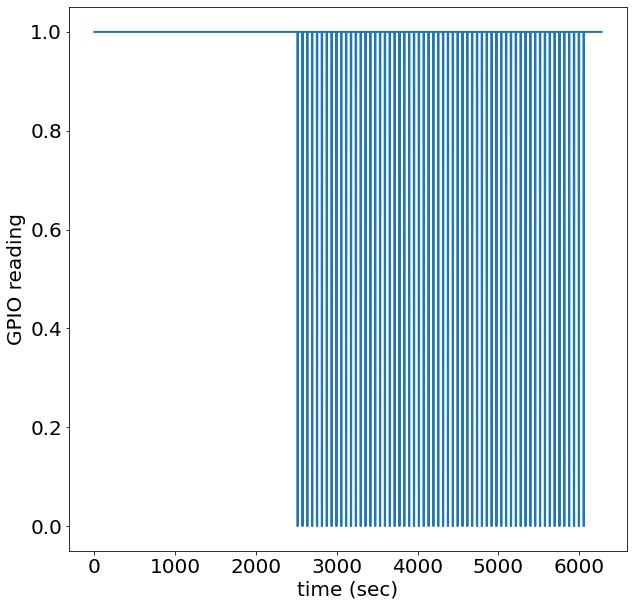

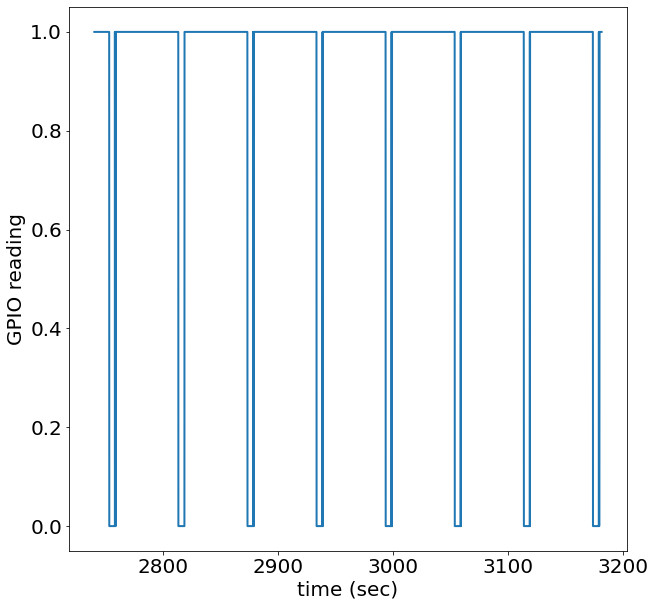

In [23]:
x_ranges = [np.arange(len(stim)), np.arange(300000,350000)]
for x_range in x_ranges:
    with plt.rc_context({'lines.linewidth': 2, 'figure.figsize': (12,5), 'font.size':20}):
        plt.figure(figsize=(10,10))
        plt.plot(time[x_range], stim[x_range])
        plt.xlabel('time (sec)')
        plt.ylabel('GPIO reading')